# Importing libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import random
from glob import glob

# Data Folder and classes

In [5]:
data_dir = "./Alzheimer_s Dataset/train"
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
print(os.listdir(data_dir))

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


# Loading images into 4 classes

In [21]:
very_mild = glob('./Alzheimer_s Dataset/train/VeryMildDemented/*')
mild = glob('./Alzheimer_s Dataset/train/MildDemented/*')
moderate = glob('./Alzheimer_s Dataset/train/ModerateDemented/*')
non = glob('./Alzheimer_s Dataset/train/NonDemented/*')

In [36]:
very_mild_test = glob('./Alzheimer_s Dataset/test/VeryMildDemented/*')
mild_test = glob('./Alzheimer_s Dataset/test/MildDemented/*')
moderate_test = glob('./Alzheimer_s Dataset/test/ModerateDemented/*')
non_test = glob('./Alzheimer_s Dataset/test/NonDemented/*')

# Reading images , converting to 2D Array and appending to list

In [65]:
image_array = []
image_array_label=[]

width = 176
height = 176
new_size = (width,height)

def resizer(image_directory):
    for file in image_directory: 
        img = Image.open(file)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        image_array.append(img_wide[0])
        if image_directory == non:
            image_array_label.append(0)
        elif image_directory == very_mild:
            image_array_label.append(1)
        elif image_directory == mild:
            image_array_label.append(2)
        else:
            image_array_label.append(3)


resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

In [37]:
resizer(non_test)
resizer(very_mild_test)
resizer(mild_test)
resizer(moderate_test)

In [38]:
print(len(image_array))
print(len(image_array_label))

6400
6400


# Train-Test split

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(image_array,image_array_label, test_size = 0.2)

In [43]:
print(len(train_x))
print(len(test_x))

5120
1280


# Images in each class

In [27]:
for alzheimers_class in classes:
    container = []
    temp_dir = data_dir + "/" + alzheimers_class
    for file in os.listdir(temp_dir):
        container.append(file)
    print(alzheimers_class, ": ", len(container))

MildDemented :  717
ModerateDemented :  52
NonDemented :  2560
VeryMildDemented :  1792


# Building SVM Model and fitting

In [44]:
modelsvm = svm.SVC(kernel = 'linear')
modelsvm.fit(train_x, train_y)

SVC(kernel='linear')

# Training accuracy

In [45]:
y_trainpred = modelsvm.predict(train_x)
y_true = train_y
print('Training Accuracy : ', metrics.accuracy_score(y_true, y_trainpred))

Training Accuracy :  1.0


# Testing Accuracy

In [46]:
y_pred = modelsvm.predict(test_x)
y_true = test_y
print('Testing Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Testing Accuracy :  0.984375


# Classification Report

In [47]:
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
print(classification_report(test_y, y_pred, target_names=classes))

                  precision    recall  f1-score   support

    MildDemented       0.99      0.99      0.99       510
ModerateDemented       0.98      0.99      0.99       367
     NonDemented       0.99      0.98      0.98       150
VeryMildDemented       0.98      0.96      0.97       253

        accuracy                           0.98      1280
       macro avg       0.98      0.98      0.98      1280
    weighted avg       0.98      0.98      0.98      1280



# Confusion matrix 

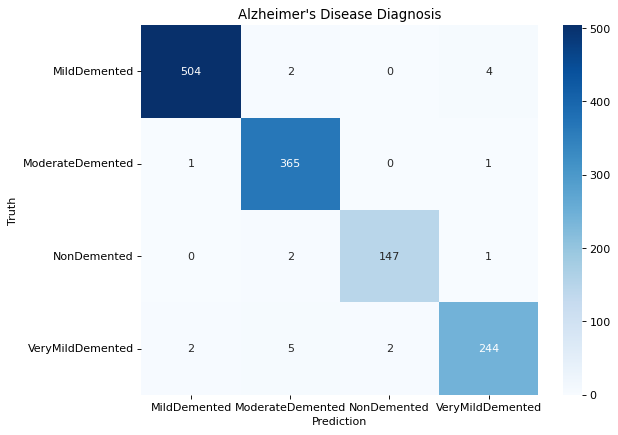

In [50]:
conf_arr = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

# K-fold Cross Validation

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [60]:
svc = SVC(kernel='linear')
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
cv_scores = cross_val_score(svc,train_x,train_y, cv=kf)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.97265625 0.95898438 0.95800781 0.96972656 0.96582031]
